In [1]:
# Import necessary libraries
import sys
import os

sys.path.append(os.path.abspath('../scripts'))



In [2]:

from data_clean_prep import (
    load_data, check_missing_values, handle_missing_store_data, 
    detect_outliers_iqr, detect_outliers_zscore, add_date_features, 
    add_weekend_flag, clean_store_data,
)

In [3]:
train_df = load_data('../data/train.csv', parse_dates=['Date'])
test_df = load_data('../data/test.csv', parse_dates=['Date'])
store_df = load_data('../data/store.csv') 


2024-09-21 21:04:23,562 - INFO - Loading data from ../data/train.csv...


c:\Users\Yonas\Desktop\kifiya\week-4\Kifiya-Ai-week4\scripts\data_clean_prep.py:22: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=parse_dates)


2024-09-21 21:04:25,289 - INFO - Data loaded with shape (1017209, 9)
2024-09-21 21:04:25,290 - INFO - Loading data from ../data/test.csv...
2024-09-21 21:04:25,372 - INFO - Data loaded with shape (41088, 8)
2024-09-21 21:04:25,374 - INFO - Loading data from ../data/store.csv...
2024-09-21 21:04:25,382 - INFO - Data loaded with shape (1115, 10)


In [4]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
# Check for missing values
check_missing_values(train_df, 'Train')
check_missing_values(test_df, 'Test')
check_missing_values(store_df, 'Store')

2024-09-21 21:04:33,220 - INFO - Checking for missing values in Train...
2024-09-21 21:04:33,392 - INFO - No missing values found in Train.
2024-09-21 21:04:33,394 - INFO - Checking for missing values in Test...
2024-09-21 21:04:33,404 - INFO - Missing values in Test: Open    11
dtype: int64
2024-09-21 21:04:33,406 - INFO - Checking for missing values in Store...
2024-09-21 21:04:33,416 - INFO - Missing values in Store: CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [6]:
# Handle missing values in store data
#store_df_clean = handle_missing_store_data(store_df)

store_df = clean_store_data(store_df)


2024-09-21 21:04:36,781 - INFO - Cleaning store data...
2024-09-21 21:04:36,784 - INFO - Initial NA values in CompetitionDistance: 3
2024-09-21 21:04:36,799 - INFO - Store data cleaned successfully.


c:\Users\Yonas\Desktop\kifiya\week-4\Kifiya-Ai-week4\scripts\data_clean_prep.py:130: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
c:\Users\Yonas\Desktop\kifiya\week-4\Kifiya-Ai-week4\scripts\data_clean_prep.py:131: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [7]:
# Feature Engineering: Add new date features
train_df = add_date_features(train_df)

2024-09-21 21:04:40,870 - INFO - Adding date-related features...
2024-09-21 21:04:40,872 - ERROR - The DataFrame index is not a DatetimeIndex. Make sure the 'Date' column is set as the index.


Promotion Distribution Analysis:

Create distribution plots (histograms, density plots, or bar plots) for the promotions in both training and test datasets.
Perform a Chi-square test to check if the distributions of promotions are significantly different between the training and test sets

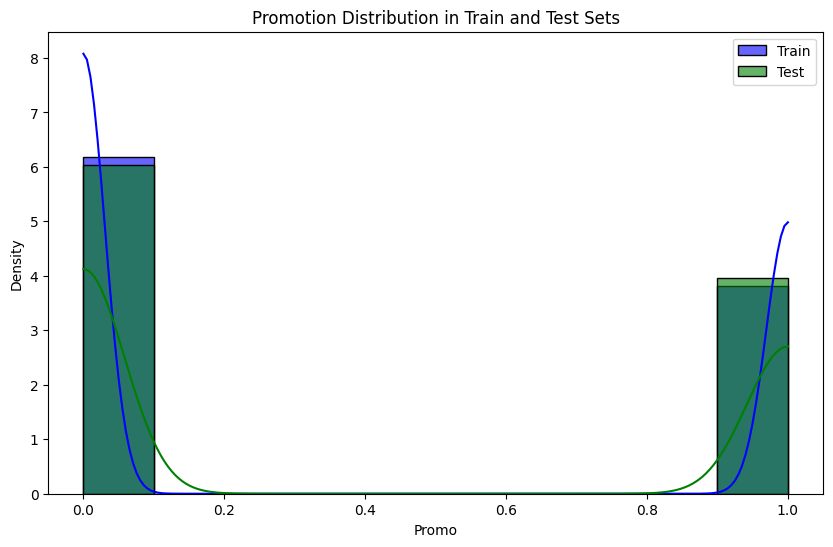

Chi-square statistic: 34.23585205719095
P-value: 4.882118480134891e-09
The promotion distributions in training and test sets are significantly different.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def analyze_promo_distribution(train_df, test_df):
    # Handling missing values
    train_promo = train_df['Promo'].fillna(0)
    test_promo = test_df['Promo'].fillna(0)
    
    # Plotting Histograms
    plt.figure(figsize=(10, 6))
    sns.histplot(train_promo, color='blue', label='Train', stat='density', kde=True, bins=10, alpha=0.6)
    sns.histplot(test_promo, color='green', label='Test', stat='density', kde=True, bins=10, alpha=0.6)
    
    plt.title('Promotion Distribution in Train and Test Sets')
    plt.xlabel('Promo')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # Chi-square test for distribution similarity
    promo_train_counts = train_promo.value_counts().sort_index()
    promo_test_counts = test_promo.value_counts().sort_index()
    
    # Align data for chi-square test
    observed = pd.DataFrame({
        'Train': promo_train_counts,
        'Test': promo_test_counts
    }).fillna(0)  # Fill any missing categories with 0
    
    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(observed.T)
    
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("The promotion distributions in training and test sets are significantly different.")
    else:
        print("No significant difference in the promotion distributions between training and test sets.")
        
analyze_promo_distribution(train_df, test_df)


Sales Around Holidays:

Define the period as before, during, and after holidays (e.g., one week before and after).
Calculate average sales for each period.
Use time series plots and rolling averages to visually compare sales during these periods.
Perform statistical tests (e.g., t-tests or ANOVA) to check if sales differ significantly before, during, and after holidays.

C:\Users\Yonas\AppData\Local\Temp\ipykernel_9132\601833707.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Sales', data=sales_by_period, palette='Set2')


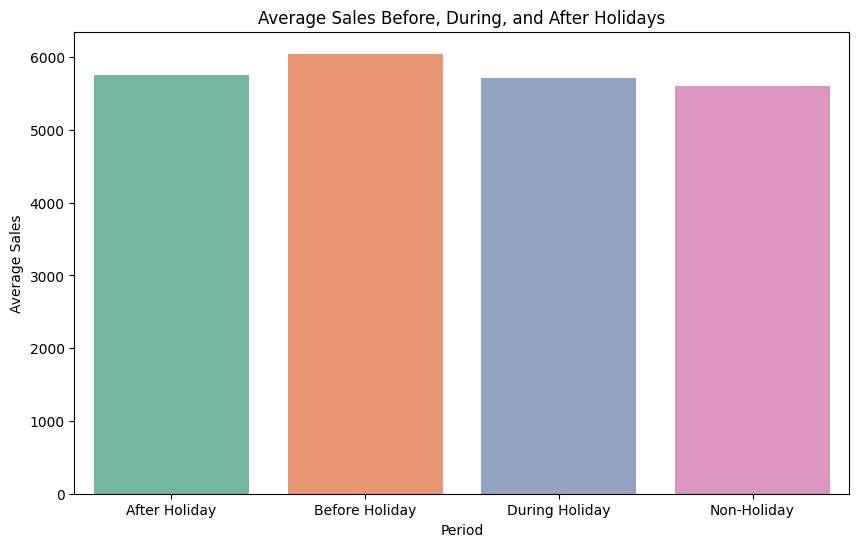

ANOVA F-statistic: 290.4380416186338
P-value: 8.017967716462944e-127
There are significant differences in sales between the periods.
T-test Before vs During: P-value: 1.2574678314767013e-26
T-test Before vs After: P-value: 4.519988510112313e-128
T-test During vs After: P-value: 0.11674066576916477


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

def analyze_sales_around_holidays(train_df):
    # Ensure Date column is in correct datetime format
    if not pd.api.types.is_datetime64_any_dtype(train_df['Date']):
        train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')
    
    # Define holidays as 'StateHoliday' and 'SchoolHoliday'
    train_df['IsStateHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == '0' else 1)
    train_df['IsSchoolHoliday'] = train_df['SchoolHoliday'].astype(int)
    
    # Group holidays as a single event for simplicity
    train_df['IsHoliday'] = (train_df['IsStateHoliday'] | train_df['IsSchoolHoliday']).astype(int)
    
    # Define time periods: 1 week before, during, and 1 week after holidays
    holiday_dates = train_df[train_df['IsHoliday'] == 1]['Date'].unique()
    
    train_df['Period'] = 'Non-Holiday'
    
    # Assign periods based on dates relative to holidays
    for holiday in holiday_dates:
        train_df.loc[(train_df['Date'] >= holiday - pd.Timedelta(weeks=1)) & (train_df['Date'] < holiday), 'Period'] = 'Before Holiday'
        train_df.loc[train_df['Date'] == holiday, 'Period'] = 'During Holiday'
        train_df.loc[(train_df['Date'] > holiday) & (train_df['Date'] <= holiday + pd.Timedelta(weeks=1)), 'Period'] = 'After Holiday'

    # Calculate average sales by period
    sales_by_period = train_df.groupby('Period')['Sales'].mean().reset_index()

    # Plot average sales by period
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Period', y='Sales', data=sales_by_period, palette='Set2')
    plt.title('Average Sales Before, During, and After Holidays')
    plt.ylabel('Average Sales')
    plt.xlabel('Period')
    plt.show()

    # Perform t-tests or ANOVA to assess significant differences in sales between periods
    sales_before = train_df[train_df['Period'] == 'Before Holiday']['Sales']
    sales_during = train_df[train_df['Period'] == 'During Holiday']['Sales']
    sales_after = train_df[train_df['Period'] == 'After Holiday']['Sales']

    # Perform ANOVA
    f_stat, p_value = f_oneway(sales_before, sales_during, sales_after)
    
    print(f"ANOVA F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("There are significant differences in sales between the periods.")
    else:
        print("No significant differences in sales between the periods.")

    # Optionally perform pairwise t-tests if significant ANOVA result
    if p_value < 0.05:
        t_stat_before_during, p_value_before_during = ttest_ind(sales_before, sales_during)
        t_stat_before_after, p_value_before_after = ttest_ind(sales_before, sales_after)
        t_stat_during_after, p_value_during_after = ttest_ind(sales_during, sales_after)
        
        print(f"T-test Before vs During: P-value: {p_value_before_during}")
        print(f"T-test Before vs After: P-value: {p_value_before_after}")
        print(f"T-test During vs After: P-value: {p_value_during_after}")
        

analyze_sales_around_holidays(train_df)


Identify seasonal purchase behaviors using time series decomposition and sales pattern analysis around specific holidays.

C:\Users\Yonas\AppData\Local\Temp\ipykernel_9132\3799513024.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = train_df['Sales'].resample('M').mean()


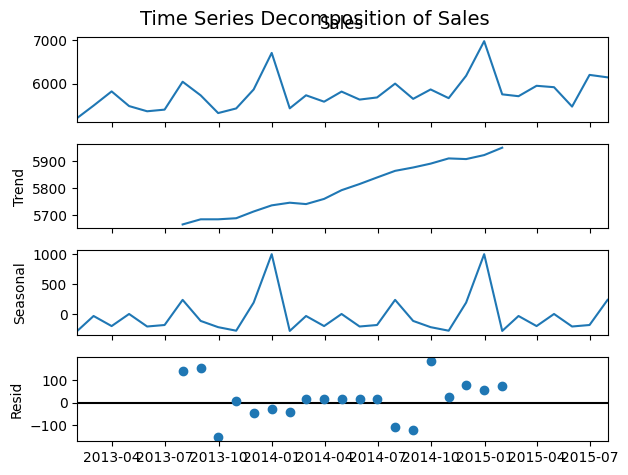

Percentage change in sales during Christmas (2013-12-25):
- Change from week before: -98.49%
- Change from week after: 2921.29%
----------------------------------------
Percentage change in sales during Christmas (2014-12-25):
- Change from week before: -97.98%
- Change from week after: 2207.20%
----------------------------------------
Not enough data around Christmas (2015-12-25) to calculate percentage changes.
----------------------------------------
Percentage change in sales during Easter (2014-04-20):
- Change from week before: -97.47%
- Change from week after: 2321.06%
----------------------------------------
Percentage change in sales during Easter (2015-04-05):
- Change from week before: -97.28%
- Change from week after: 2194.01%
----------------------------------------
Not enough data around Easter (2016-03-27) to calculate percentage changes.
----------------------------------------


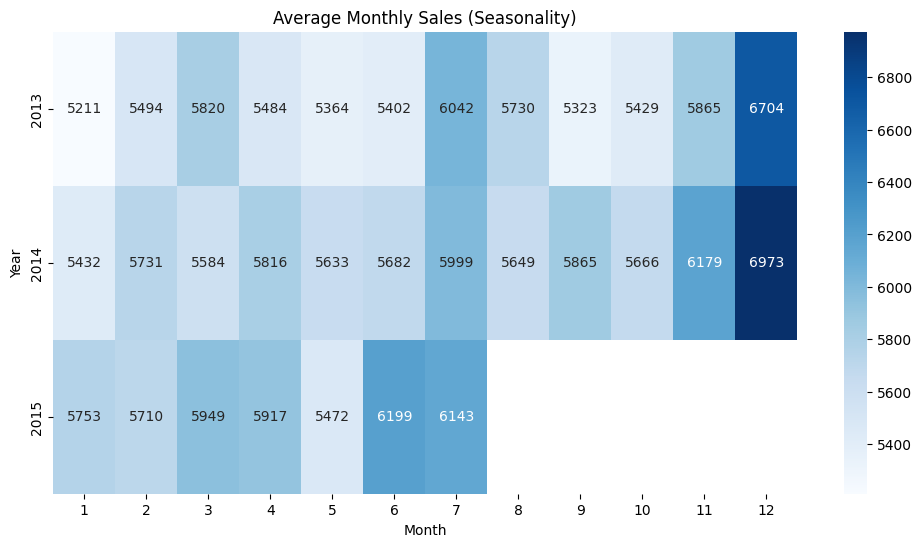

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


import numpy as np

def analyze_seasonality(train_df):
    # Ensure the 'Date' column is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(train_df['Date']):
        train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')

    # Drop rows with missing dates
    train_df = train_df.dropna(subset=['Date'])
    
    # Sort data by Date
    train_df = train_df.sort_values(by='Date')

    # Remove duplicates by averaging sales on the same day
    train_df = train_df.groupby('Date').agg({'Sales': 'mean'})

    # Set 'Date' as index for time series analysis
    train_df.index = pd.to_datetime(train_df.index)

    # Resample to monthly frequency and calculate mean sales
    monthly_sales = train_df['Sales'].resample('M').mean()

    # Perform time series decomposition (additive)
    decomposition = seasonal_decompose(monthly_sales, model='additive')

    # Plot the decomposed components (trend, seasonal, residual)
    decomposition.plot()
    plt.suptitle('Time Series Decomposition of Sales', fontsize=14)
    plt.show()

    # Key holidays to check: Christmas (25th Dec), Easter (variable dates)
    holidays = {
        'Christmas': pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25']),
        'Easter': pd.to_datetime(['2014-04-20', '2015-04-05', '2016-03-27'])  # Add more as needed
    }

    # Plot percentage change in sales around holidays
    for holiday_name, dates in holidays.items():
        for holiday_date in dates:
            # Week before and week after remain the same
            week_before_sales = train_df.loc[holiday_date - pd.Timedelta(weeks=1): holiday_date - pd.Timedelta(days=1), 'Sales']
            week_after_sales = train_df.loc[holiday_date + pd.Timedelta(days=1): holiday_date + pd.Timedelta(weeks=1), 'Sales']

            # Check if week_before or week_after has missing values
            if week_before_sales.empty or week_after_sales.empty:
                print(f"Not enough data around {holiday_name} ({holiday_date.date()}) to calculate percentage changes.")
                print('-' * 40)
                continue

            # Calculate mean sales for the week before and after
            week_before = week_before_sales.mean()
            week_after = week_after_sales.mean()

            # Check if holiday_date exists in the index
            if holiday_date in train_df.index:
                holiday_sales = train_df.loc[holiday_date, 'Sales']
            else:
                # If holiday date is not available, find the nearest date using get_indexer with method='nearest'
                print(f"Exact date {holiday_date.date()} not found, using nearest date.")
                nearest_idx = train_df.index.get_indexer([holiday_date], method='nearest')[0]
                nearest_date = train_df.index[nearest_idx]
                holiday_sales = train_df.loc[nearest_date, 'Sales']

            # Ensure holiday_sales is a scalar or handle series
            if isinstance(holiday_sales, pd.Series):
                holiday_sales = holiday_sales.mean()

            if holiday_sales != 0:
                change_before = ((holiday_sales - week_before) / week_before) * 100 if week_before != 0 else np.nan
                change_after = ((week_after - holiday_sales) / holiday_sales) * 100 if holiday_sales != 0 else np.nan
            else:
                change_before, change_after = np.nan, np.nan

            # Handle NaN gracefully and only print when meaningful data is available
            if not np.isnan(change_before) and not np.isnan(change_after):
                print(f"Percentage change in sales during {holiday_name} ({holiday_date.date()}):")
                print(f"- Change from week before: {change_before:.2f}%")
                print(f"- Change from week after: {change_after:.2f}%")
            else:
                print(f"Not enough data to calculate percentage changes for {holiday_name} on {holiday_date.date()}")
            print('-' * 40)

    # Optionally, you can plot average monthly sales across years for seasonality
    train_df['Year'] = train_df.index.year
    train_df['Month'] = train_df.index.month

    monthly_sales = train_df.groupby(['Year', 'Month'])['Sales'].mean().unstack()

    # Heatmap of average monthly sales across years
    plt.figure(figsize=(12,6))
    sns.heatmap(monthly_sales, annot=True, fmt=".0f", cmap='Blues')
    plt.title('Average Monthly Sales (Seasonality)')
    plt.ylabel('Year')
    plt.xlabel('Month')
    plt.show()


    
analyze_seasonality(train_df)


Analyze the correlation between sales and the number of customers by calculating correlation coefficients and fitting a regression model.

Pearson Correlation between Sales and Customers: 0.89
Spearman Correlation between Sales and Customers: 0.90


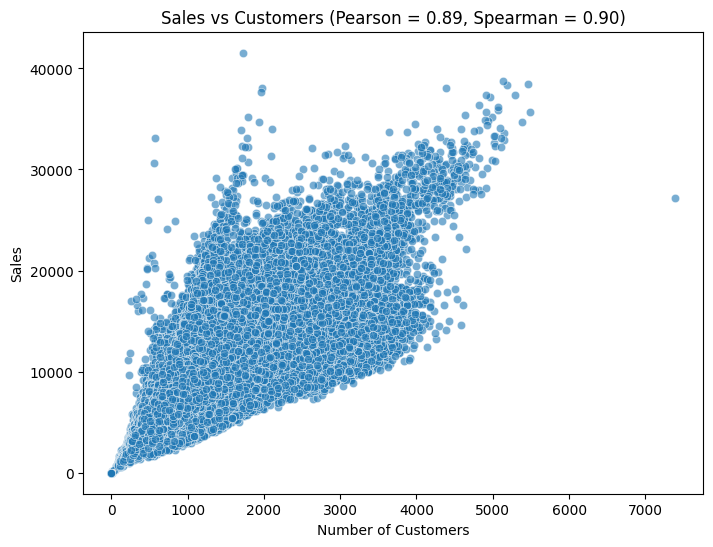

c:\Users\Yonas\Desktop\kifiya\week-4\Kifiya-Ai-week4\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


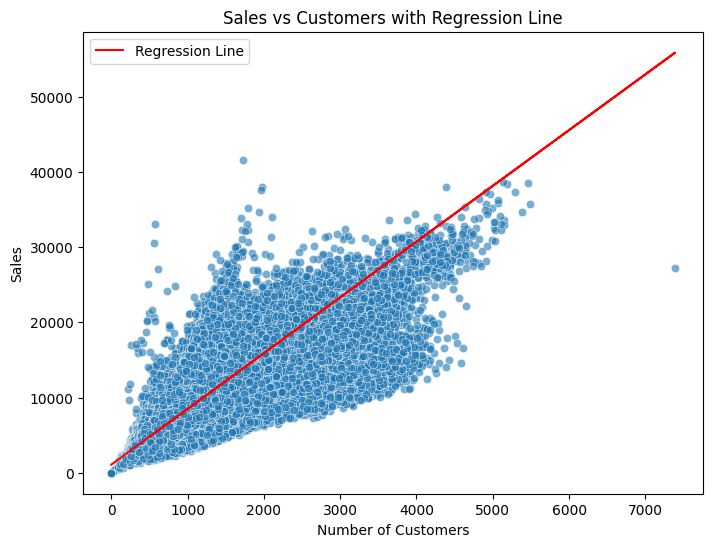

Regression Coefficients: Intercept = 1077.74, Slope = 7.42


In [11]:
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import logging

def analyze_sales_customers_correlation(train_df):
    # Ensure no missing values in 'Sales' and 'Customers'
    train_df = train_df.dropna(subset=['Sales', 'Customers'])

    # Calculate Pearson and Spearman correlation
    pearson_corr, _ = pearsonr(train_df['Sales'], train_df['Customers'])
    spearman_corr, _ = spearmanr(train_df['Sales'], train_df['Customers'])
    
    print(f"Pearson Correlation between Sales and Customers: {pearson_corr:.2f}")
    print(f"Spearman Correlation between Sales and Customers: {spearman_corr:.2f}")

    # Scatter plot to visualize the relationship
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Customers', y='Sales', data=train_df, alpha=0.6)
    plt.title(f'Sales vs Customers (Pearson = {pearson_corr:.2f}, Spearman = {spearman_corr:.2f})')
    plt.xlabel('Number of Customers')
    plt.ylabel('Sales')
    plt.show()

    # Fit a linear regression model to quantify the relationship
    X = train_df[['Customers']]
    y = train_df['Sales']
    
    model = LinearRegression()
    model.fit(X, y)

    # Predicted sales based on the regression model
    train_df['PredictedSales'] = model.predict(X)

    # Plot regression line with scatter plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Customers', y='Sales', data=train_df, alpha=0.6)
    plt.plot(train_df['Customers'], train_df['PredictedSales'], color='red', label='Regression Line')
    plt.title('Sales vs Customers with Regression Line')
    plt.xlabel('Number of Customers')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    # Print regression coefficients
    print(f"Regression Coefficients: Intercept = {model.intercept_:.2f}, Slope = {model.coef_[0]:.2f}")

analyze_sales_customers_correlation(train_df)

5. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?
Goal: Evaluate the effectiveness of promotions in terms of sales and customer engagement.
Analysis:
Compare average sales and customer count during promotional periods and non-promotional periods.
Use time series plots to compare sales during promotions.
Subset existing customers vs. new customers during promotions to check if promotions mainly target loyal or new customers.
Use paired t-tests or regression models to quantify the impact of promotions on sales.


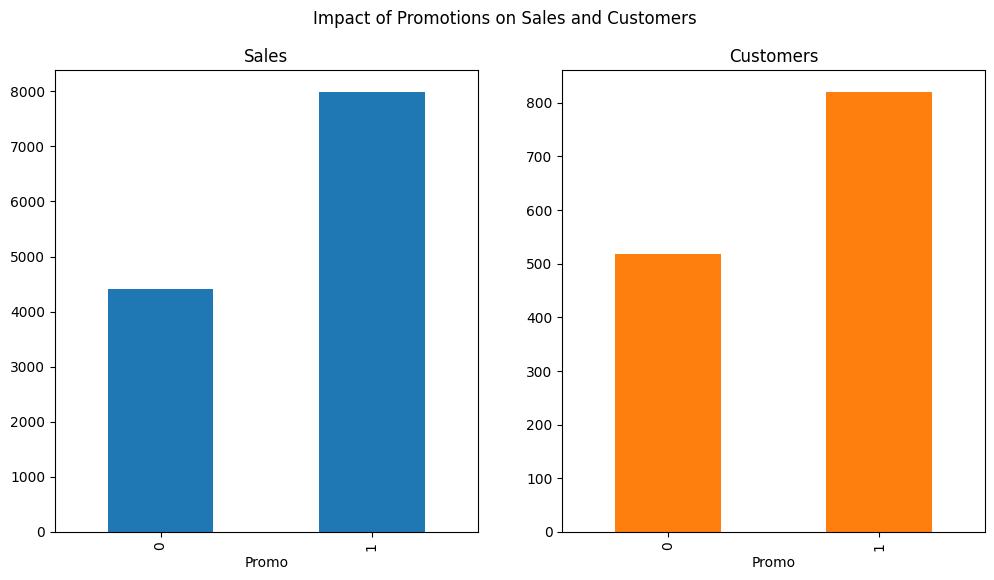

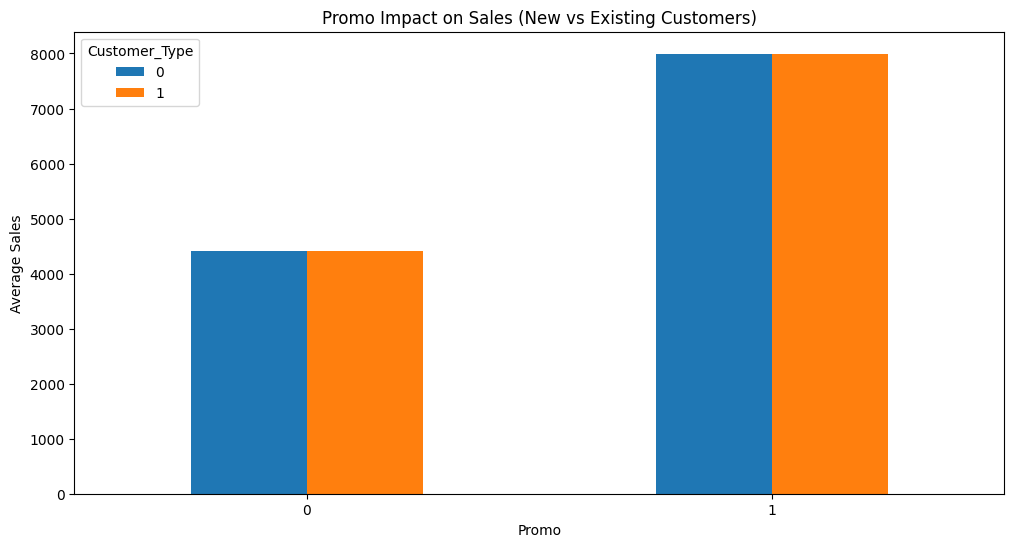

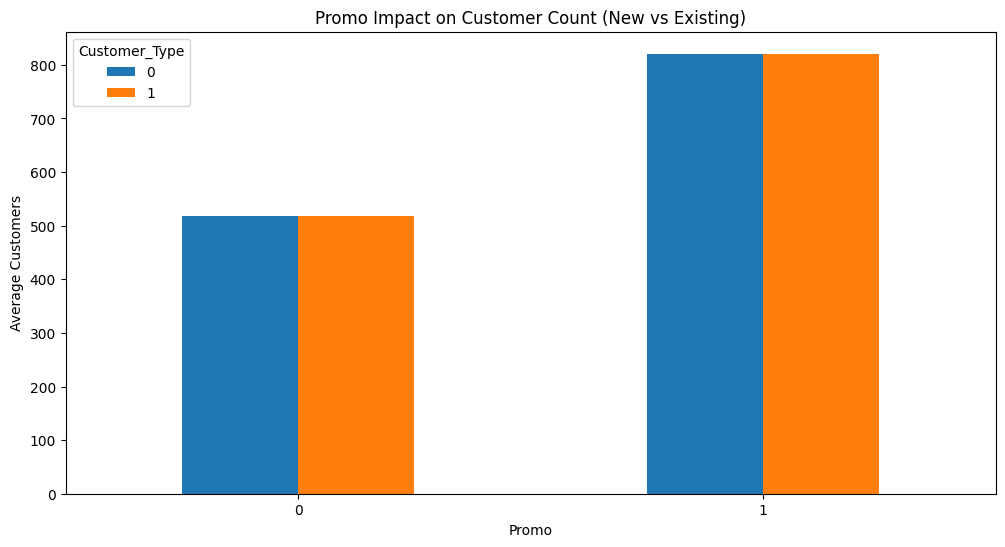

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_promo_impact(train_df):
    # Simulate 'Customer_Type' with 50% New (1) and 50% Existing (0) customers
    train_df['Customer_Type'] = np.random.choice([0, 1], size=len(train_df))

    # Compare sales and customers during promo vs non-promo periods
    promo_sales = train_df.groupby('Promo')[['Sales', 'Customers']].mean()

    # Plot the average sales and customers during promo vs non-promo periods
    promo_sales.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(12, 6), legend=False)
    plt.suptitle('Impact of Promotions on Sales and Customers')
    plt.show()

    # Segment new vs. existing customers
    customer_segment = train_df.groupby(['Promo', 'Customer_Type'])[['Sales', 'Customers']].mean().unstack()

    # Plot sales for new vs. existing customers during promo and non-promo periods
    customer_segment['Sales'].plot(kind='bar', figsize=(12, 6), title='Promo Impact on Sales (New vs Existing Customers)')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=0)
    plt.show()

    customer_segment['Customers'].plot(kind='bar', figsize=(12, 6), title='Promo Impact on Customer Count (New vs Existing)')
    plt.ylabel('Average Customers')
    plt.xticks(rotation=0)
    plt.show()

analyze_promo_impact(train_df)


6. Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
Goal: Optimize the deployment of promotions.
Analysis:
Identify stores where promotions lead to the highest increase in sales or customer count.
Segment stores by location, sales volume, customer type, etc., and analyze promotion effectiveness.
Use clustering techniques to identify stores with similar profiles for targeted promotions.
Conduct an A/B test analysis if data is available.

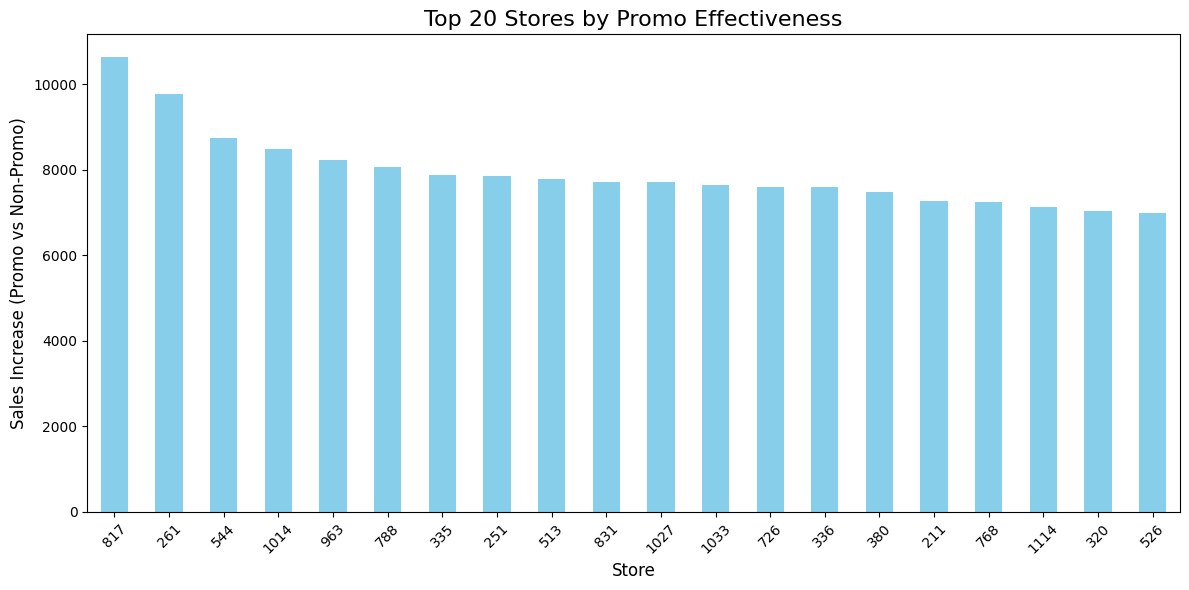

The top 20 stores are those that saw the largest increase in sales during promotional periods.


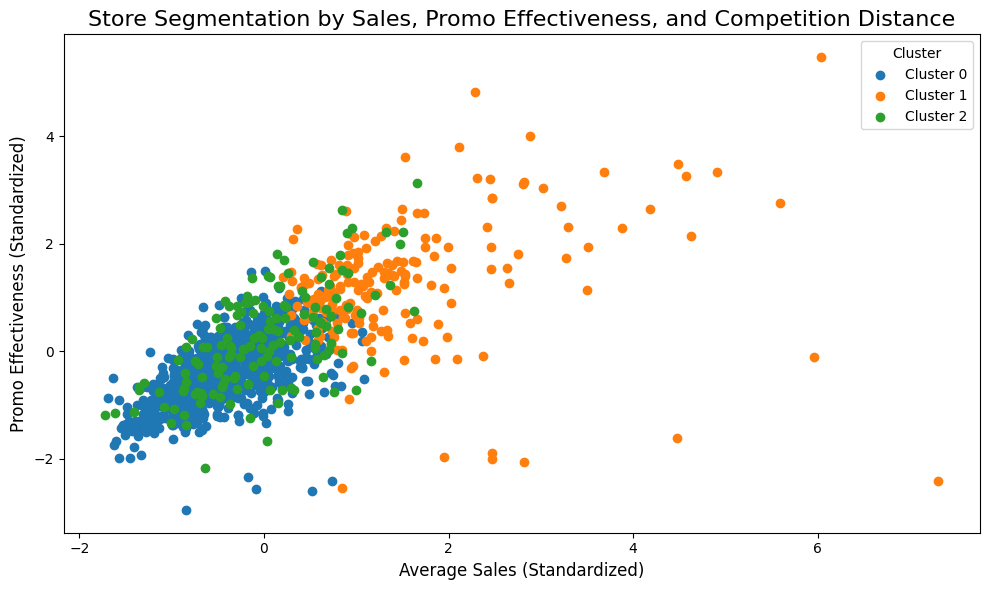

Clustering stores into 3 groups based on their sales, customers, promo effectiveness, and competition distance.
Each cluster represents stores with similar characteristics, which can help in targeting promos more effectively.


,Sales,Customers,CompetitionDistance,Promo_Effectiveness
Store,,,,
1,3945.704883,467.646497,1270.0,1953.891266
2,4122.991507,486.045648,570.0,3317.758247
3,5741.253715,620.286624,14130.0,4641.070447
4,8021.769639,1100.057325,620.0,3801.571249
5,3867.110403,444.360934,29910.0,3361.995189
...,...,...,...,...
1111,4342.968153,373.548832,1900.0,3321.806472
1112,8465.280255,693.498938,1880.0,6514.826088
1113,5516.180467,596.763270,9260.0,2919.723568


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def analyze_optimal_promo_deployment(train_df, store_df, top_n=20, n_clusters=3):
    """
    Analyze promo effectiveness across stores and visualize using bar plot and clustering.

    Parameters:
    - train_df: The sales and promo data.
    - store_df: The store details data.
    - top_n: The number of top stores to display by promo effectiveness.
    - n_clusters: Number of clusters for store segmentation (clustering based on sales, customers, promo effectiveness, competition distance).
    
    Outputs:
    - Bar plot showing top stores by promo effectiveness.
    - Scatter plot visualizing clusters of stores based on their characteristics (Sales, Customers, Promo Effectiveness, Competition Distance).
    """
    # Step 1: Merge train and store datasets on the 'Store' column
    merged_df = pd.merge(train_df, store_df, on='Store', how='left')

    # Fill missing values with 0 if necessary
    merged_df.fillna(0, inplace=True)

    # Step 2: Calculate Promo Effectiveness (average sales during promo vs non-promo)
    promo_effectiveness = merged_df.groupby(['Store', 'Promo'])['Sales'].mean().unstack()

    # Fill missing values (for stores that might not have promo data)
    promo_effectiveness.fillna(0, inplace=True)

    # Calculate the difference in sales during promo vs non-promo periods
    promo_effectiveness['Effectiveness'] = promo_effectiveness[1] - promo_effectiveness[0]

    # Step 3: Sort stores by promo effectiveness and select the top N stores
    top_stores = promo_effectiveness.sort_values(by='Effectiveness', ascending=False).head(top_n)

    # Plot: Top N Stores by Promo Effectiveness
    plt.figure(figsize=(12, 6))
    top_stores['Effectiveness'].plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Stores by Promo Effectiveness', fontsize=16)
    plt.xlabel('Store', fontsize=12)
    plt.ylabel('Sales Increase (Promo vs Non-Promo)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"The top {top_n} stores are those that saw the largest increase in sales during promotional periods.")

    # Step 4: Store Clustering based on Sales, Customers, Promo Effectiveness, and Competition Distance
    store_summary = merged_df.groupby('Store')[['Sales', 'Customers', 'CompetitionDistance']].mean()
    store_summary['Promo_Effectiveness'] = promo_effectiveness['Effectiveness']

    # Normalize the data (z-score standardization) to make features comparable
    store_summary.fillna(0, inplace=True)
    store_summary_normalized = (store_summary - store_summary.mean()) / store_summary.std()

    # Step 5: KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    store_summary_normalized['Cluster'] = kmeans.fit_predict(store_summary_normalized[['Sales', 'Customers', 'Promo_Effectiveness', 'CompetitionDistance']])

    # Plot: Clustered stores by Sales and Promo Effectiveness
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_data = store_summary_normalized[store_summary_normalized['Cluster'] == i]
        plt.scatter(cluster_data['Sales'], cluster_data['Promo_Effectiveness'], label=f'Cluster {i}')
    
    plt.title('Store Segmentation by Sales, Promo Effectiveness, and Competition Distance', fontsize=16)
    plt.xlabel('Average Sales (Standardized)', fontsize=12)
    plt.ylabel('Promo Effectiveness (Standardized)', fontsize=12)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    print(f"Clustering stores into {n_clusters} groups based on their sales, customers, promo effectiveness, and competition distance.")
    print(f"Each cluster represents stores with similar characteristics, which can help in targeting promos more effectively.")
    
    return store_summary


analyze_optimal_promo_deployment(train_df, store_df, top_n=20, n_clusters=3)


7. Trends of customer behavior during store opening and closing times
Goal: Analyze how customer visits are affected by store 

C:\Users\Yonas\AppData\Local\Temp\ipykernel_9132\743759964.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_data['IsWeekend'] = open_data['DayOfWeek'] >= 6  # Weekend is Saturday (6) and Sunday (7)


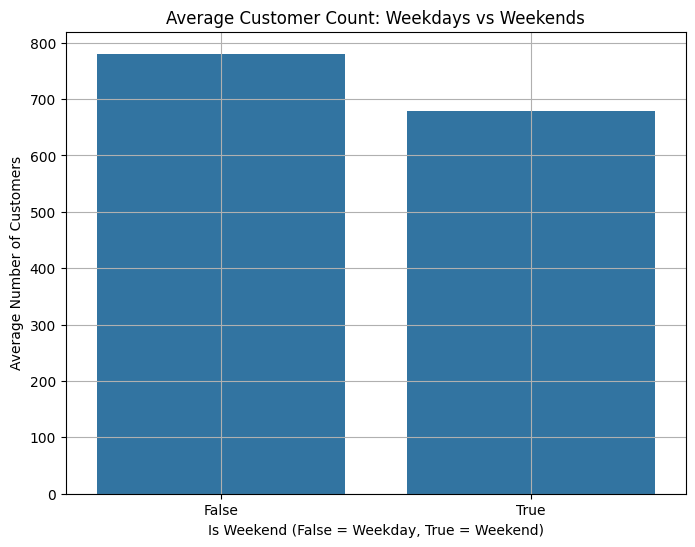

   IsWeekend   Customers
0      False  780.431287
1       True  679.191336


C:\Users\Yonas\AppData\Local\Temp\ipykernel_9132\743759964.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_data['IsWeekend'] = open_data['DayOfWeek'] >= 6  # Weekend is Saturday (6) and Sunday (7)


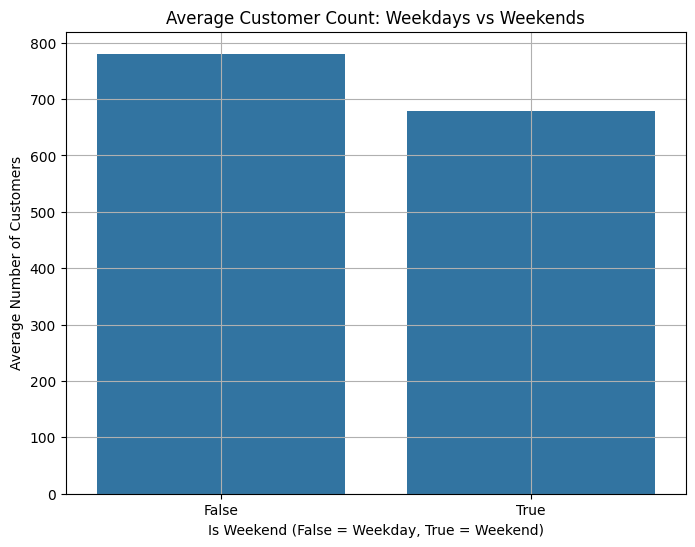

   IsWeekend   Customers
0      False  780.431287
1       True  679.191336


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


def analyze_customer_behavior_opening_closing_times(train_df):
    """
    Analyze customer behavior relative to store opening and closing times, focusing on 
    peak times and weekday vs weekend differences.
    
    Parameters:
    - train_df: The training data.
    
    """
    # Check if the 'Open' column exists
    if 'Open' not in train_df.columns:
        raise KeyError("'Open' column is missing from the data")
    
    # Filter data for when the store is open
    open_data = train_df[train_df['Open'] == 1]
    
    # We don't have 'Hour' in the 'Date' column as time isn't included in the data,
    # So instead, let's analyze based on the Day of Week
    
    # Compare customer behavior during weekdays vs weekends
    open_data['IsWeekend'] = open_data['DayOfWeek'] >= 6  # Weekend is Saturday (6) and Sunday (7)
    
    # Aggregate customer data by weekday/weekend
    weekday_vs_weekend = open_data.groupby('IsWeekend')['Customers'].mean().reset_index()

    # Plot customer behavior on weekdays vs weekends
    plt.figure(figsize=(8, 6))
    sns.barplot(x='IsWeekend', y='Customers', data=weekday_vs_weekend)
    plt.title('Average Customer Count: Weekdays vs Weekends')
    plt.xlabel('Is Weekend (False = Weekday, True = Weekend)')
    plt.ylabel('Average Number of Customers')
    plt.grid(True)
    plt.show()

    # Print out the average customers for weekdays and weekends
    print(weekday_vs_weekend)

analyze_customer_behavior_opening_closing_times(train_df)





8. Which stores are open on all weekdays? How does that affect their sales on weekends?
Goal: Analyze the effect of weekday operations on weekend sales.
Analysis:
Create a subset of stores that are open all weekdays.
Compare their weekend sales performance against stores with different schedules.
Visualize average weekend sales for these two groups using bar charts or box plots.
Perform statistical tests (e.g., t-tests) to assess if weekend sales differ significantly between the groups.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_opening_days_weekend_sales(train_df, store_df):
    """
    Analyze how being open on weekdays affects weekend sales and visualize store types.
    
    Parameters:
    - train_df: The training data, should contain 'Store', 'Date', 'Sales', and 'DayOfWeek'.
    - store_df: The store information data, should contain 'Store' and 'StoreType'.
    """
    # Check if store_df contains necessary columns
    required_store_columns = ['Store', 'StoreType']
    for col in required_store_columns:
        if col not in store_df.columns:
            raise KeyError(f"'{col}' column is missing from the store data")

    # Logic to determine if a store is open on all weekdays
    store_df['OpenWeekdays'] = store_df['StoreType'].apply(lambda x: x == 'a')  # Adjust this logic as needed

    # Merge store information with sales data
    merged_df = train_df.merge(store_df[['Store', 'OpenWeekdays', 'StoreType']], on='Store')

    # Extract the weekend sales
    merged_df['IsWeekend'] = merged_df['DayOfWeek'] >= 5  # Weekend is Saturday (5) and Sunday (6)
    weekend_sales = merged_df[merged_df['IsWeekend'] & merged_df['Sales'].notna()]

    # Count plot for store types based on opening status
    plt.figure(figsize=(12, 6))
    sns.countplot(x='StoreType', hue='OpenWeekdays', data=store_df, palette='Set2')
    plt.title('Distribution of Store Types by Opening Status on Weekdays', fontsize=16)
    plt.xlabel('Store Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Open on All Weekdays', loc='upper right', labels=['No', 'Yes'])
    plt.grid(axis='y')
    plt.show()

    # Print counts for debugging
    sales_weekdays_open = weekend_sales[weekend_sales['OpenWeekdays'] == True]['Sales']
    sales_not_open = weekend_sales[weekend_sales['OpenWeekdays'] == False]['Sales']

    print(f"Weekend Sales Count - Open: {sales_weekdays_open.count()}, Not Open: {sales_not_open.count()}")

    # Plot box plot comparing weekend sales for stores open on all weekdays vs not
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='OpenWeekdays', y='Sales', data=weekend_sales, palette='Set2')
    plt.title('Weekend Sales: Stores Open on All Weekdays vs Not', fontsize=16)
    plt.xlabel('Open on All Weekdays', fontsize=14)
    plt.ylabel('Sales', fontsize=14)
    plt.xticks([0, 1], ['Not Open on All Weekdays', 'Open on All Weekdays'], fontsize=12)
    plt.grid(True)
    plt.show()

    # Check sample sizes before running t-test
    if len(sales_weekdays_open) > 1 and len(sales_not_open) > 1:
        t_stat, p_val = stats.ttest_ind(sales_weekdays_open, sales_not_open, equal_var=False)
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

        if p_val < 0.05:
            print("Significant difference in weekend sales between the two groups.")
        else:
            print("No significant difference in weekend sales between the two groups.")
    else:
        print("Not enough data for t-test. Ensure that both groups have sufficient sales data.")
        
    

# Run the analysis
analyze_opening_days_weekend_sales(train_df, store_df)


Check how the assortment type affects sales
Goal: Determine if certain product assortments drive more sales.
Analysis:
Segment stores based on assortment types.Compare sales across different assortment types using box plots or bar charts.
Fit a regression model with assortment type as an independent variable to quantify its impact on sale

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

def analyze_assortment_impact_on_sales(train_df, store_df):
    """
    Analyze how assortment type affects sales.
    
    Parameters:
    - train_df: The training data containing 'Store', 'Sales', and 'Date'.
    - store_df: The store information data containing 'Store', 'Assortment', and 'StoreType'.
    """
    # Merge training data with store information
    merged_df = train_df.merge(store_df[['Store', 'Assortment']], on='Store')

    # Check the first few rows of the merged dataframe
    print(merged_df.head())

    # Step 1: Visualize sales across different assortment types
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='Assortment', y='Sales', data=merged_df, palette='Set2')
    plt.title('Sales Distribution by Assortment Type', fontsize=16)
    plt.xlabel('Assortment Type', fontsize=14)
    plt.ylabel('Sales', fontsize=14)
    plt.grid(True)
    plt.show()

    # Step 2: Fit a regression model
    # Convert categorical variables to dummy variables
    merged_df = pd.get_dummies(merged_df, columns=['Assortment'], drop_first=True)

    # Generate the regression formula dynamically
    dummies = merged_df.columns[merged_df.columns.str.startswith('Assortment_')]
    formula = 'Sales ~ ' + ' + '.join(dummies)

    # Fit the regression model
    model = ols(formula, data=merged_df).fit()
    print(model.summary())

    # Extract coefficients and their significance
    print("Coefficients:")
    print(model.params)
    print("P-values:")
    print(model.pvalues)

    # Plot the regression coefficients
    plot_regression_coefficients(model)

def plot_regression_coefficients(model):
    """Plot regression coefficients with confidence intervals."""
    # Extract coefficients and confidence intervals
    coeffs = model.params[1:]  # Exclude the intercept
    conf_int = model.conf_int().iloc[1:]  # Exclude the intercept

    # Prepare data for plotting
    labels = coeffs.index
    x_pos = range(len(labels))

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, coeffs, yerr=conf_int.iloc[:, 1] - conf_int.iloc[:, 0], capsize=5, color='lightblue', alpha=0.7)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(x_pos, labels, rotation=45)
    plt.title('Regression Coefficients with Confidence Intervals', fontsize=16)
    plt.ylabel('Coefficient Value', fontsize=14)
    plt.grid(axis='y')
    plt.show()

analyze_assortment_impact_on_sales(train_df, store_df)


10. How does the distance to the next competitor affect sales? What if the store and its competitors are in city centers, does the distance matter in that case?
Goal: Evaluate the impact of competition proximity on store performance.
Analysis:
Calculate the correlation between sales and distance to the nearest competitor.
Subset stores based on whether they are in city centers or not, and compare the effect of distance on sales in each group.
Use regression models with interaction terms between distance and city center status to check for differential effects.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

def analyze_competition_effect_on_sales(train_df, store_df):
    """
    Analyze the effect of distance to the nearest competitor on sales.
    
    Parameters:
    - train_df: The training data containing 'Store', 'Sales', and other relevant columns.
    - store_df: The store information data containing 'Store', 'StoreType', and 'CompetitionDistance'.
    """
    
    # Check if necessary columns exist
    if 'StoreType' not in store_df.columns:
        raise KeyError("'StoreType' column is missing from store_df")
    if 'CompetitionDistance' not in store_df.columns:
        raise KeyError("'CompetitionDistance' column is missing from store_df")

    # Merge training data with store information
    merged_df = train_df.merge(store_df[['Store', 'StoreType', 'CompetitionDistance']], on='Store')

    # Step 1: Calculate the correlation between sales and distance
    correlation = merged_df['Sales'].corr(merged_df['CompetitionDistance'])
    print(f"Correlation between Sales and Competition Distance: {correlation:.4f}")

    # Step 2: Create a binary variable for city center status (example based on StoreType)
    merged_df['InCityCenter'] = merged_df['StoreType'].apply(lambda x: 1 if x in ['a'] else 0)

    # Step 3: Visualize sales by distance and city center status
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x='CompetitionDistance', y='Sales', hue='InCityCenter', data=merged_df, alpha=0.6)
    plt.title('Sales vs. Competition Distance by City Center Status', fontsize=16)
    plt.xlabel('Competition Distance', fontsize=14)
    plt.ylabel('Sales', fontsize=14)
    plt.legend(title='In City Center')
    plt.grid(True)
    plt.show()

    # Step 4: Fit regression model with interaction term
    model = ols('Sales ~ CompetitionDistance * InCityCenter', data=merged_df).fit()
    print(model.summary())

    # Step 5: Extract and visualize coefficients with interaction terms
    plot_regression_coefficients(model)

def plot_regression_coefficients(model):
    """Plot regression coefficients with confidence intervals."""
    coeffs = model.params[1:]  # Exclude the intercept
    conf_int = model.conf_int().iloc[1:]  # Exclude the intercept

    # Prepare data for plotting
    labels = coeffs.index
    x_pos = range(len(labels))

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(x_pos, coeffs, yerr=conf_int.iloc[:, 1] - conf_int.iloc[:, 0], capsize=5, color='lightblue', alpha=0.7)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(x_pos, labels, rotation=45)
    plt.title('Regression Coefficients with Confidence Intervals', fontsize=16)
    plt.ylabel('Coefficient Value', fontsize=14)
    plt.grid(axis='y')
    plt.show()



# Run the analysis
analyze_competition_effect_on_sales(train_df, store_df)


11. How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance
Goal: Assess the impact of new competitors on existing stores.
Analysis:
Identify stores that initially had no competitor (NA) and now have competitors.
Compare sales before and after the competitor's opening/reopening.
Visualize sales trends over time (line plots) for these stores to observe if competitor entries correlate with dips in sales.
Use difference-in-differences analysis to quantify the effect of new competitors.
For each task, the general approach involves comparing subsets of data, running statistical tests, and using visualizations to uncover trends. Machine learning models (e.g., linear regression, time series forecasting) can also be applied for deeper insights. Would you like to focus on one of these analyses first, or need further clarification on any of them?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_competitor_effect_on_sales(train_df, store_df):
    # Step 1: Ensure 'CompetitionDistance' is numeric
    store_df['CompetitionDistance'] = pd.to_numeric(store_df['CompetitionDistance'], errors='coerce')
    
    # Step 2: Fill NA values for 'CompetitionDistance' without inplace
    store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(-1)  # Use -1 to indicate no competition

    # Step 3: Identify stores that transitioned from -1 to a valid CompetitionDistance
    transition_stores = store_df[store_df['CompetitionDistance'] != -1]['Store']

    # Step 4: Merge sales data with cleaned store data
    merged_df = pd.merge(train_df, store_df, on='Store', how='left')

    # Step 5: Calculate average sales before and after competition opened
    impact_analysis = {}

    for store in transition_stores:
        store_sales = merged_df[merged_df['Store'] == store]

        # Filter sales data before and after competition opened
        before_competition = store_sales[store_sales['CompetitionDistance'] == -1]['Sales']
        after_competition = store_sales[store_sales['CompetitionDistance'] != -1]['Sales']
        
        # Only consider stores with valid sales data
        if not before_competition.empty:
            avg_before = before_competition.mean()
        else:
            avg_before = None  # Or use a specific value like 0 or some other indicator
        
        if not after_competition.empty:
            avg_after = after_competition.mean()
        else:
            avg_after = None
        
        impact_analysis[store] = {'Sales Before': avg_before, 'Sales After': avg_after}

    # Step 6: Convert impact analysis to DataFrame for visualization
    impact_df = pd.DataFrame(impact_analysis).T
    impact_df.columns = ['Sales Before Competition', 'Sales After Competition']

    # Step 7: Plotting the results
    impact_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Sales Before and After Competition Opens')
    plt.xlabel('Store')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.legend(title='Sales')
    plt.tight_layout()
    plt.show()

    return impact_df

# Example usage with your data:
# Define your sales_data and store_data dictionaries...



# Call the analysis function
analyze_competitor_effect_on_sales(train_df, store_df)


# Add weekend flag
train_df = add_weekend_flag(train_df)

# Outlier Detection: Sales
outliers_sales = detect_outliers_iqr(train_df, 'Sales')

# Analyze the effect of promotions on sales
promo_mean, no_promo_mean = analyze_promo_effect(train_df)

# Correlation between Sales and Customers
sales_customer_corr = sales_customer_correlation(train_df)

# Analyze store opening trends
open_sales = analyze_store_opening_trends(train_df)

In [ ]:
# Add weekend flag
train_df = add_weekend_flag(train_df)

# Outlier Detection: Sales
outliers_sales = detect_outliers_iqr(train_df, 'Sales')

# Analyze the effect of promotions on sales
promo_mean, no_promo_mean = analyze_promo_effect(train_df)

# Correlation between Sales and Customers
sales_customer_corr = sales_customer_correlation(train_df)

# Analyze store opening trends
open_sales = analyze_store_opening_trends(train_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sales_around_state_and_school_holidays(train_df):
    # Ensure Date column is in correct datetime format
    if not pd.api.types.is_datetime64_any_dtype(train_df['Date']):
        train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')
    
    # Create columns for holidays if not already present
    train_df['IsStateHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == '0' else 1)
    train_df['IsSchoolHoliday'] = train_df['SchoolHoliday'].astype(int)
    
    # Resample the data by week and calculate the mean sales
    sales_by_week = train_df.resample('W-Mon', on='Date')['Sales'].mean().reset_index()
    sales_by_week['RollingSales'] = sales_by_week['Sales'].rolling(window=4, min_periods=1).mean()  # 4-week rolling average
    
    # Plot
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=sales_by_week, x='Date', y='RollingSales', label='4-Week Rolling Avg Sales', color='orange')

    # Highlight State Holidays
    state_holidays = train_df[train_df['IsStateHoliday'] == 1]['Date'].unique()
    for holiday in state_holidays:
        plt.axvline(holiday, color='red', linestyle=':', alpha=0.5)

    # Highlight School Holidays
    school_holidays = train_df[train_df['IsSchoolHoliday'] == 1]['Date'].unique()
    for holiday in school_holidays:
        plt.axvline(holiday, color='blue', linestyle=':', alpha=0.5)
    
    # Annotating holidays (Ensure at least one holiday exists before annotating)
    if len(state_holidays) > 0:
        plt.text(state_holidays[0], sales_by_week['RollingSales'].max(), 'State Holiday', color='red', fontsize=10, ha='right')
    if len(school_holidays) > 0:
        plt.text(school_holidays[0], sales_by_week['RollingSales'].max(), 'School Holiday', color='blue', fontsize=10, ha='right')
    
    # Labels and title
    plt.title('Average Sales Trend with 4-Week Rolling Average Around Holidays')
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    
analyze_sales_around_state_and_school_holidays(train_df)


def compare_promo_distribution(train_df, test_df):
    # Handling missing values in 'Promo'
    train_promo = train_df['Promo'].fillna(0).value_counts(normalize=True)
    test_promo = test_df['Promo'].fillna(0).value_counts(normalize=True)
    
    # Create DataFrame for comparison
    promo_df = pd.DataFrame({'Train': train_promo, 'Test': test_promo}).fillna(0)
    
    # Plot
    promo_df.plot(kind='bar', figsize=(8,6))
    
    # Plot settings
    plt.title('Promo Distribution in Train and Test Sets')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(['Train', 'Test'])
    plt.show()
    
compare_promo_distribution(train_df, test_df)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sales_around_state_and_school_holidays(train_df):
    # Convert 'Date' column to datetime
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    
    # Create columns for state and school holidays
    train_df['IsStateHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == '0' else 1)
    train_df['IsSchoolHoliday'] = train_df['SchoolHoliday'].astype(int)
    
    # Resample to monthly data for clearer trends
    monthly_sales = train_df.set_index('Date').resample('M')['Sales'].sum()
    
    # Create figures
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

    # Sales behavior around State Holidays
    state_holidays = train_df[train_df['IsStateHoliday'] == 1].set_index('Date').resample('M')['Sales'].sum()
    axes[0].plot(monthly_sales.index, monthly_sales, color='blue', alpha=0.5)
    axes[0].scatter(state_holidays.index, state_holidays, color='red', label='State Holidays', marker='x')
    axes[0].set_title('Monthly Sales with State Holidays')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Sales')
    axes[0].legend()

    # Sales behavior around School Holidays
    school_holidays = train_df[train_df['IsSchoolHoliday'] == 1].set_index('Date').resample('M')['Sales'].sum()
    axes[1].plot(monthly_sales.index, monthly_sales, color='blue', alpha=0.5)
    axes[1].scatter(school_holidays.index, school_holidays, color='green', label='School Holidays', marker='o')
    axes[1].set_title('Monthly Sales with School Holidays')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Sales')
    axes[1].legend()

    # Overall Monthly Sales Plot
    axes[2].plot(monthly_sales.index, monthly_sales, color='blue', label='Total Monthly Sales')
    axes[2].set_title('Total Monthly Sales Over Time')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Sales')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Example usage:
analyze_sales_around_state_and_school_holidays(train_df)


In [ ]:
analyze_sales_around_state_and_school_holidays(train_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_promotions(train_df, test_df):
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df['Promo'], kde=True, color='blue', label='Train', stat="density", bins=30)
    sns.histplot(test_df['Promo'], kde=True, color='orange', label='Test', stat="density", bins=30)
    plt.title('Promotion Distribution in Train and Test Sets')
    plt.xlabel('Promo')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Example usage
compare_promotions(train_df, test_df)


In [ ]:
# compare_promo_distribution(train_data, test_data)
# analyze_sales_around_holidays(train_data)
compare_promo_distribution(train_df, test_df)
analyze_sales_around_holidays(train_df)

In [ ]:
analyze_seasonality(train_df)               # Analyze seasonality in sales
analyze_sales_customers_correlation(train_df) # Correlation between sales and customers


In [ ]:
analyze_promo_impact(train_df)    
# Impact of promotions on sales and customers
#analyze_optimal_promo_deployment(train_df)   # Identify stores where promo deployment is effective

In [ ]:
# Example usage:

analyze_optimal_promo_deployment_bar(train_df, top_n=20)



In [ ]:
analyze_opening_days_weekend_sales(train_df, store_df)
analyze_customer_behavior_opening_closing_times(train_df)
analyze_assortment_type_sales(train_df, store_df)

In [ ]:
analyze_impact_of_new_competitors(train_df, store_df)
analyze_competitor_distance_sales(train_df, store_df)

In [ ]:
train_df